In [37]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os
dataset_path = "/content/drive/MyDrive/criminal_dataset/"  # Update with actual folder name
print(os.listdir(dataset_path))  # Check if files are there

['B02982.jpg', 'B03062.jpg', 'B03019.jpg', 'B02991.jpg', 'B03005.jpg', 'B02997.jpg', 'B03040.jpg', 'B03004.jpg', 'B03054.jpg', 'B03023.jpg', 'B02995.jpg', 'B03164.jpg', 'B03141.jpg', 'B03120.jpg', 'B03174.jpg', 'B03084.jpg', 'B03069.jpg', 'B03101.jpg', 'B03158.jpg', 'B03186.jpg', 'B03118.jpg', 'B03066.jpg', 'B03191.jpg', 'B03234.jpg', 'B03208.jpg', 'B03244.jpg', 'B03278.jpg', 'B03296.jpg', 'B03292.jpg', 'B03299.jpg', 'B03254.jpg', 'B03340.jpg', 'B03368.jpg', 'B03336.jpg', 'B03314.jpg', 'B03327.jpg', 'B03301.jpg', 'B03386.jpg', 'B03303.jpg', 'B03381.jpg', 'B03363.jpg', 'B03335.jpg', 'B03378.jpg', 'B03541.jpg', 'B03462.jpg', 'B03495.jpg', 'B03436.jpg', 'B03392.jpg', 'B03390.jpg', 'B03401.jpg', 'B03524.jpg', 'B03536.jpg', 'B03414.jpg', 'B03501.jpg', 'B03439.jpg', 'B03490.jpg', 'B03459.jpg', 'B03547.jpg', 'B03438.jpg', 'B03593.jpg', 'B03567.jpg', 'B03620.jpg', 'B03708.jpg', 'B03596.jpg', 'B03678.jpg', 'B03674.jpg', 'B03705.jpg', 'B03643.jpg', 'B03627.jpg', 'B03577.jpg', 'B03557.jpg', 'B036

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from glob import glob
from scipy.signal import convolve2d
from tqdm import tqdm  # For progress bar


In [40]:
# Set dataset path (update if needed)
dataset_path = "/content/drive/MyDrive/criminal_dataset/"

# Set output directories
output_blur_path = "/content/drive/MyDrive/processed_blur/"
output_edge_path = "/content/drive/MyDrive/processed_edge/"

# Create folders to save results
os.makedirs(output_blur_path, exist_ok=True)
os.makedirs(output_edge_path, exist_ok=True)


In [41]:
# Get all image files (JPG, PNG, JPEG)
image_files = glob(os.path.join(dataset_path, "*.jpg")) + \
              glob(os.path.join(dataset_path, "*.png")) + \
              glob(os.path.join(dataset_path, "*.jpeg"))

print(f"Total images found: {len(image_files)}")


Total images found: 2144


In [42]:
# Low-pass filter (Blurring)
H_L = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

# High-pass filter (Edge detection)
H_H = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])


In [43]:
for img_path in tqdm(image_files, desc="Processing Images"):
    # Load image in grayscale
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Skip if image failed to load
    if image is None:
        print(f"Skipping corrupt/invalid file: {img_path}")
        continue  # Skip to the next image

    # Resize image
    image = cv2.resize(image, (256, 256))

    # Apply convolution filters
    blurred_image = convolve2d(image, H_L, mode='same', boundary='symm')
    edge_image = convolve2d(image, H_H, mode='same', boundary='symm')

    # Save processed images
    filename = os.path.basename(img_path)
    cv2.imwrite(os.path.join(output_blur_path, filename), blurred_image)
    cv2.imwrite(os.path.join(output_edge_path, filename), edge_image)

print("✅ Processing completed! Skipped corrupt files.")


Processing Images:   7%|▋         | 154/2144 [01:48<20:11,  1.64it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B04630.jpg


Processing Images:  13%|█▎        | 271/2144 [02:54<16:49,  1.86it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B06088.jpg


Processing Images:  22%|██▏       | 463/2144 [04:35<15:03,  1.86it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B09213.jpg


Processing Images:  24%|██▎       | 506/2144 [04:58<14:14,  1.92it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B09724.jpg


Processing Images:  35%|███▌      | 755/2144 [07:13<11:46,  1.97it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B12719.jpg


Processing Images:  39%|███▉      | 832/2144 [07:53<11:29,  1.90it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B13502.jpg


Processing Images:  43%|████▎     | 923/2144 [08:43<10:06,  2.01it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B14500.jpg


Processing Images:  48%|████▊     | 1027/2144 [09:38<10:01,  1.86it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A15763.jpg


Processing Images:  49%|████▉     | 1058/2144 [09:55<10:47,  1.68it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A56106.jpg


Processing Images:  52%|█████▏    | 1121/2144 [10:29<08:51,  1.92it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A61982.jpg


Processing Images:  57%|█████▋    | 1231/2144 [11:26<08:23,  1.81it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A70618.jpg


Processing Images:  66%|██████▌   | 1408/2144 [13:06<06:59,  1.76it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A81652.jpg


Processing Images:  67%|██████▋   | 1434/2144 [13:19<06:43,  1.76it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A81850.jpg


Processing Images:  68%|██████▊   | 1452/2144 [13:28<06:12,  1.86it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A82134.jpg


Processing Images:  69%|██████▊   | 1470/2144 [13:38<06:58,  1.61it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A82875.jpg


Processing Images:  72%|███████▏  | 1539/2144 [14:14<04:21,  2.31it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A86277.jpg


Processing Images:  74%|███████▍  | 1589/2144 [14:41<05:26,  1.70it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A91256.jpg


Processing Images:  74%|███████▍  | 1596/2144 [14:44<05:22,  1.70it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A90976.jpg


Processing Images:  77%|███████▋  | 1641/2144 [15:11<03:56,  2.13it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A92207.jpg


Processing Images:  79%|███████▊  | 1686/2144 [15:34<04:01,  1.90it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A93211.jpg


Processing Images:  79%|███████▉  | 1689/2144 [15:35<03:06,  2.44it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A93184.jpg


Processing Images:  83%|████████▎ | 1772/2144 [16:23<03:40,  1.69it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B00366.jpg


Processing Images:  85%|████████▌ | 1825/2144 [16:51<03:00,  1.77it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B00857.jpg


Processing Images:  86%|████████▌ | 1837/2144 [16:57<02:31,  2.03it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B01107.jpg


Processing Images:  89%|████████▉ | 1904/2144 [17:33<02:02,  1.96it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/B01791.jpg


Processing Images:  93%|█████████▎| 2003/2144 [18:25<01:11,  1.97it/s]

Skipping corrupt/invalid file: /content/drive/MyDrive/criminal_dataset/A00220.jpg


Processing Images: 100%|██████████| 2144/2144 [19:38<00:00,  1.82it/s]

✅ Processing completed! Skipped corrupt files.


Sample Blurred Image:


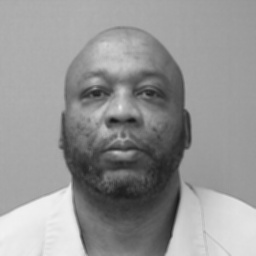

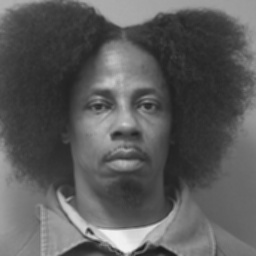

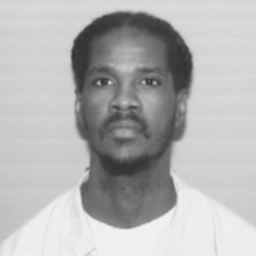

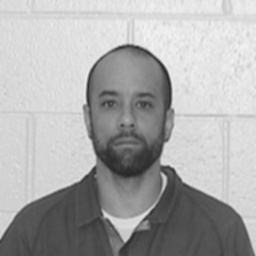

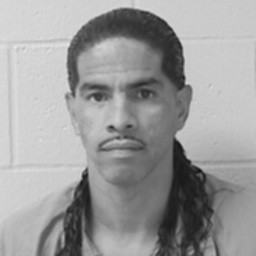

Sample Edge-Detected Image:


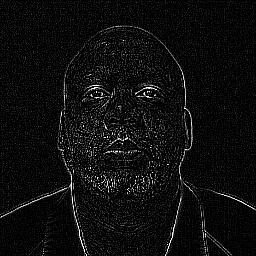

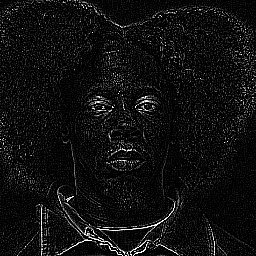

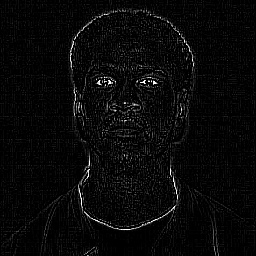

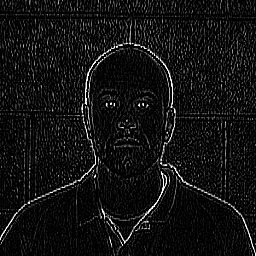

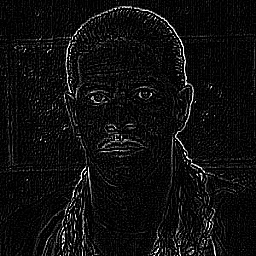

In [44]:
from IPython.display import display
from PIL import Image

# Show 5 blurred images
print("Sample Blurred Image:")
for i in range(5):
    img = Image.open(os.path.join(output_blur_path, os.path.basename(image_files[i])))
    display(img)

# Show 5 edge-detected images
print("Sample Edge-Detected Image:")
for i in range(5):
    img = Image.open(os.path.join(output_edge_path, os.path.basename(image_files[i])))
    display(img)


In [45]:
print(f"Total blurred images saved: {len(os.listdir(output_blur_path))}")
print(f"Total edge-detected images saved: {len(os.listdir(output_edge_path))}")


Total blurred images saved: 2118
Total edge-detected images saved: 2118


In [48]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from glob import glob
from tqdm import tqdm

# Paths to datasets
front_face_path = "/content/drive/MyDrive/criminal_dataset/"
side_profile_path = "/content/drive/MyDrive/side_profile/"

# Image properties
IMG_SIZE = 256

# Load dataset
def load_images_from_folder(folder, label):
    images = []
    labels = []
    image_files = glob(os.path.join(folder, "*.jpg")) + \
                  glob(os.path.join(folder, "*.png")) + \
                  glob(os.path.join(folder, "*.jpeg"))

    for img_path in tqdm(image_files, desc=f"Loading {folder}"):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image
        images.append(img)
        labels.append(label)  # 0 for front-face, 1 for side-profile

    return np.array(images), np.array(labels)

# Load data from both folders
front_faces, labels_front = load_images_from_folder(front_face_path, label=0)
side_profiles, labels_side = load_images_from_folder(side_profile_path, label=1)

# Combine datasets
X = np.concatenate((front_faces, side_profiles), axis=0)
y = np.concatenate((labels_front, labels_side), axis=0)

# Normalize images (scale pixel values to [0,1])
X = X / 255.0

# Reshape data for fully connected network
X = X.reshape(X.shape[0], -1)  # Flatten images

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define fully connected network
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMG_SIZE * IMG_SIZE,)),  # Input layer
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_val, y_val))

# Evaluate model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.4f}")

# Save model
model.save("/content/drive/MyDrive/face_classification_model.h5")


Loading /content/drive/MyDrive/side_profile/: 100%|██████████| 2044/2044 [00:46<00:00, 44.34it/s] 
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6269 - loss: 4.9591 - val_accuracy: 0.8478 - val_loss: 0.4912
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8588 - loss: 0.4690 - val_accuracy: 0.9384 - val_loss: 0.1975
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8675 - loss: 0.3954 - val_accuracy: 0.9372 - val_loss: 0.1887
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8979 - loss: 0.2504 - val_accuracy: 0.9336 - val_loss: 0.1897
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9005 - loss: 0.2539 - val_accuracy: 0.8744 - val_loss: 0.3157
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8620 - loss: 0.3737 - val_accuracy: 0.7669 - val_loss: 0.5382
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9227 - loss: 0.2293 - val_accuracy: 0.9130 - val_loss: 0.2222
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9219 - loss: 0.2044 - val_accu

Validation Accuracy: 0.8696


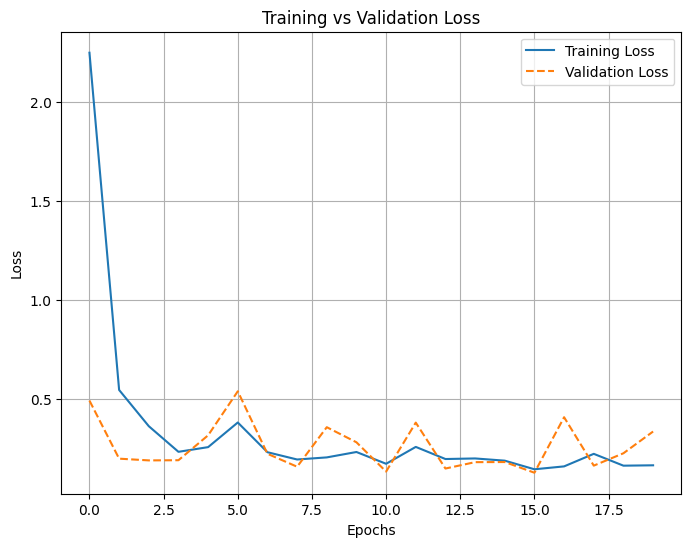

In [49]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing the training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate some random dataset (replace with your actual dataset)
X = torch.rand(1000, 20)  # 1000 samples, 20 features
y = torch.randint(0, 2, (1000,))  # Binary classification (0 or 1)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch datasets
train_dataset = DataLoader.TensorDataset(X_train, y_train)
test_dataset = DataLoader.TensorDataset(X_test, y_test)

train_loader = DataLoader.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Output layer for 2 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Testing the network
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate and print performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")


Epoch 1/20, Loss: 0.6970036268234253
Epoch 2/20, Loss: 0.6924918103218078
Epoch 3/20, Loss: 0.691288788318634
Epoch 4/20, Loss: 0.690906686782837
Epoch 5/20, Loss: 0.6893689417839051
Epoch 6/20, Loss: 0.6906262135505676
Epoch 7/20, Loss: 0.6882586789131164
Epoch 8/20, Loss: 0.685755078792572
Epoch 9/20, Loss: 0.6847408890724183
Epoch 10/20, Loss: 0.6822856187820434
Epoch 11/20, Loss: 0.6818828749656677
Epoch 12/20, Loss: 0.6789497923851013
Epoch 13/20, Loss: 0.6776935982704163
Epoch 14/20, Loss: 0.6749890899658203
Epoch 15/20, Loss: 0.6723628163337707
Epoch 16/20, Loss: 0.6688898301124573
Epoch 17/20, Loss: 0.6668267059326172
Epoch 18/20, Loss: 0.6655412650108338
Epoch 19/20, Loss: 0.6605667376518249
Epoch 20/20, Loss: 0.6529892921447754
Test Accuracy: 0.4800
Test Precision: 0.4573
Test Recall: 0.4800
Test F1 Score: 0.4597
